In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/Admission_Predict.csv',encoding = "ISO-8859-1") 

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
 

df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


In [3]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.columns=['Serial','GRE','TOEFL','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']

In [6]:
df = df[['Chance_of_Admit','GRE','TOEFL','University_Rating','SOP','LOR','CGPA']]
df.head()

,Chance_of_Admit,GRE,TOEFL,University_Rating,SOP,LOR,CGPA
0,0.920,337,118,4,4.500,4.500,9.650
1,0.760,324,107,4,4.000,4.500,8.870
2,0.720,316,104,3,3.000,3.500,8.000
3,0.800,322,110,3,3.500,2.500,8.670
4,0.650,314,103,2,2.000,3.000,8.210


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
Chance_of_Admit      400 non-null float64
GRE                  400 non-null int64
TOEFL                400 non-null int64
University_Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
dtypes: float64(4), int64(3)
memory usage: 22.0 KB


,Chance_of_Admit,GRE,TOEFL,University_Rating,SOP,LOR,CGPA
Chance_of_Admit,1.000,0.803,0.792,0.711,0.676,0.670,0.873
GRE,0.803,1.000,0.836,0.669,0.613,0.558,0.833
TOEFL,0.792,0.836,1.000,0.696,0.658,0.568,0.828
University_Rating,0.711,0.669,0.696,1.000,0.735,0.660,0.746
SOP,0.676,0.613,0.658,0.735,1.000,0.730,0.718
LOR,0.670,0.558,0.568,0.660,0.730,1.000,0.670
CGPA,0.873,0.833,0.828,0.746,0.718,0.670,1.000


<function matplotlib.pyplot.show(*args, **kw)>

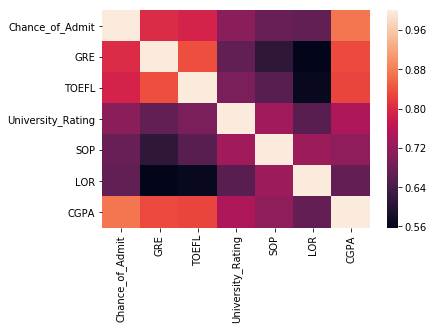

In [8]:
correlation_matrix = df.corr()
display(correlation_matrix)
sns.heatmap(df.corr())
plt.show

In [9]:
import scipy
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Re-fit the model here.
linear_formula = 'Chance_of_Admit ~ SOP + University_Rating + LOR'

lm = smf.ols(formula=linear_formula, data=df).fit()
print(lm.params)
print()
print(lm.pvalues)
print()
print(lm.rsquared)

Intercept           0.333
SOP                 0.027
University_Rating   0.049
LOR                 0.043
dtype: float64

Intercept           0.000
SOP                 0.001
University_Rating   0.000
LOR                 0.000
dtype: float64

0.5894773447173111


## OLS

In [22]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Chance_of_Admit']
X =  df[['SOP','University_Rating','LOR','TOEFL']]
regr.fit(X,Y)
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
 


Coefficients: 
 [0.00604193 0.02070427 0.03776807 0.01205194]

Intercept: 
 -0.7850098166852286

R-squared:
0.7123635093600151


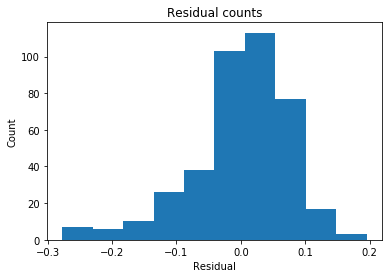

In [23]:
# Extract predicted values.
sqrroot_outcome = [math.sqrt(x) for x in  df.Chance_of_Admit]

predicted = regr.predict(X).ravel()
actual = df['Chance_of_Admit']
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

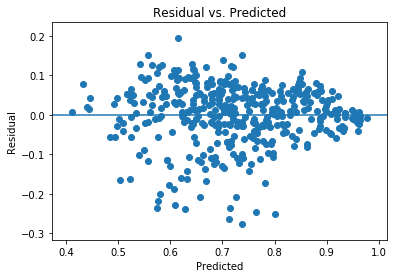

RMSE: 0.07638821871987904


In [24]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5))  

In [25]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=10))

With 20% Holdout: 0.5781560297621386
Testing on Sample: 0.7123635093600151

[0.71192802 0.50107316 0.5378105  0.57502865 0.72764471 0.81491598
 0.54666187 0.77914867 0.74129988 0.6971068 ]


## OLR with PCA

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
X = df[['University_Rating','SOP','LOR','TOEFL']]
Y = df['Chance_of_Admit'] 
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
 
regr.fit(Y_sklearn,Y)
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(Y_sklearn, Y))


predicted = regr.predict(Y_sklearn).ravel()
actual = df['Chance_of_Admit']
# Calculate the error 
residual = actual - predicted
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5)) 

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.95611532 0.0292236  0.00877507]

Coefficients: 
 [-0.01846939  0.03352383 -0.00649449]

Intercept: 
 0.72435

R-squared:
0.7062361625811489
RMSE: 0.07719755730912038


In [27]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=10))

With 20% Holdout: 0.5781560297621385
Testing on Sample: 0.712363509360015

[0.71192802 0.50107316 0.5378105  0.57502865 0.72764471 0.81491598
 0.54666187 0.77914867 0.74129988 0.6971068 ]


## OLR with PLS

In [28]:
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
pls1 = PLSRegression(n_components=3)
# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)
print('score: ',pls1.score(X,Y))

predicted = pls1.predict(X).ravel()
actual = df['Chance_of_Admit']
# Calculate the error 
residual = actual - predicted
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5)) 

score:  0.7123514185522248
RMSE: 0.07638982419344446


In [29]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=10))

With 20% Holdout: 0.5781560297621385
Testing on Sample: 0.712363509360015

[0.71192802 0.50107316 0.5378105  0.57502865 0.72764471 0.81491598
 0.54666187 0.77914867 0.74129988 0.6971068 ]


### KNN

In [30]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')
X =  df[['University_Rating','SOP','LOR','TOEFL']]
Y = df['Chance_of_Admit']
knn.fit(X, Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='distance')

In [31]:
# Inspect the results. 
print('\nR-squared:')
print(knn.score(X, Y)) 


R-squared:
0.9502791110690472


In [32]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, Y, cv=10))

With 20% Holdout: 0.4943122760849412
Testing on Sample: 0.9502791110690472

[0.67760838 0.33250922 0.514983   0.50190184 0.62195055 0.67396718
 0.22846413 0.57937379 0.7089755  0.60327148]


In [33]:
# Extract predicted values.
predicted = knn.predict(X).ravel()
actual = df['Chance_of_Admit']
# Calculate the error 
residual = actual - predicted 
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5))  


RMSE: 0.031759513010540114
